In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, Flatten, Dense, MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/BC.s/base  /content

#load Dataset

In [ ]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/BC.s/preprocessing.py  /content

In [ ]:
import preprocessing

In [ ]:
X_train, X_val, y_train, y_val = preprocessing.loadData()

#Model

In [ ]:
img_size = 128

# model

In [121]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), name='conv1', activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), name='conv2', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), name='conv3', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), name='conv4', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

In [122]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv3 (Conv2D)              (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 14, 14, 128)    

## compile model

In [ ]:
import math
initial_learning_rate = 0.0001
epochs = 50
decay = initial_learning_rate / epochs
def lr_exp_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs = epochs,
    shuffle=True,
    validation_data = (X_val, y_val),
    callbacks=[keras.callbacks.LearningRateScheduler(lr_exp_decay)],
) 

Epoch 1/50
50/50 [==============================] - 3s 48ms/step - loss: 0.6732 - accuracy: 0.5852 - val_loss: 0.6267 - val_accuracy: 0.7919 - lr: 1.0000e-04
Epoch 2/50
50/50 [==============================] - 2s 42ms/step - loss: 0.5330 - accuracy: 0.7711 - val_loss: 0.3503 - val_accuracy: 0.8890 - lr: 1.0000e-04
Epoch 3/50
50/50 [==============================] - 2s 42ms/step - loss: 0.3303 - accuracy: 0.8867 - val_loss: 0.2525 - val_accuracy: 0.9142 - lr: 9.9999e-05
Epoch 4/50
50/50 [==============================] - 2s 42ms/step - loss: 0.2708 - accuracy: 0.9009 - val_loss: 0.2110 - val_accuracy: 0.9319 - lr: 9.9999e-05
Epoch 5/50
50/50 [==============================] - 2s 42ms/step - loss: 0.2300 - accuracy: 0.9214 - val_loss: 0.1831 - val_accuracy: 0.9369 - lr: 9.9998e-05
Epoch 6/50
50/50 [==============================] - 2s 42ms/step - loss: 0.2126 - accuracy: 0.9233 - val_loss: 0.1590 - val_accuracy: 0.9508 - lr: 9.9997e-05
Epoch 7/50
50/50 [==============================] - 

In [ ]:
model.save('./cnnBasic.h5', overwrite=True)

## plot acc

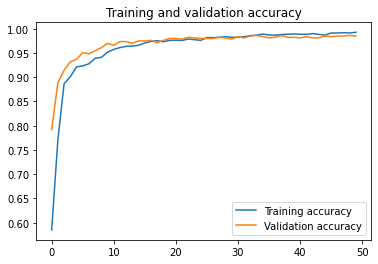

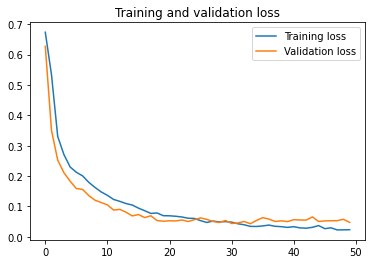

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()